In [5]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns          

df=pd.read_csv("Flight_Booking.csv")
df=df.drop(columns=["Unnamed: 0"])
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [20]:
df.shape

(300153, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [24]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [21]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

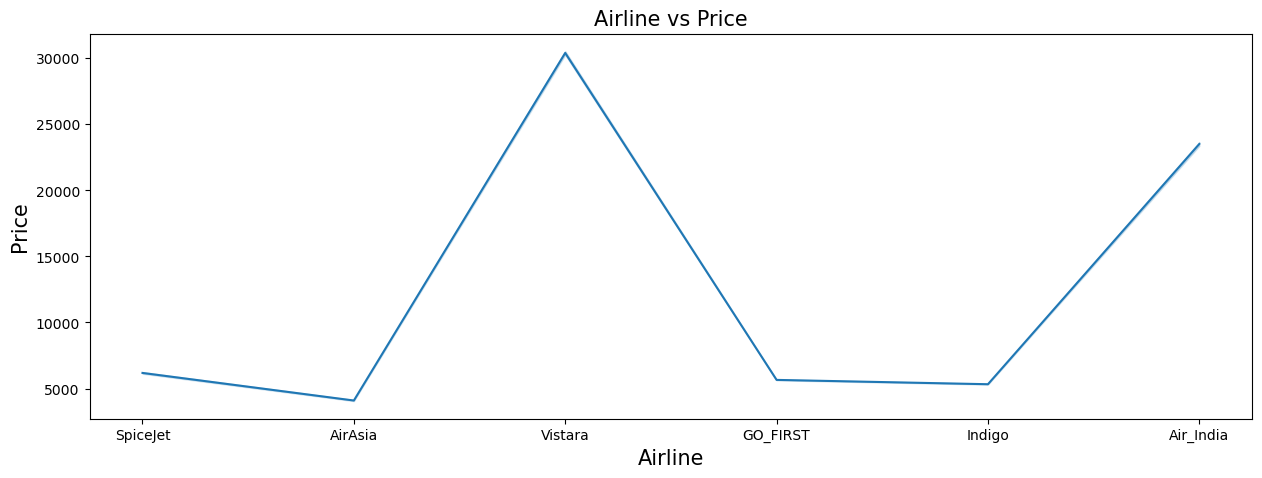

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airline vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)  
plt.show()

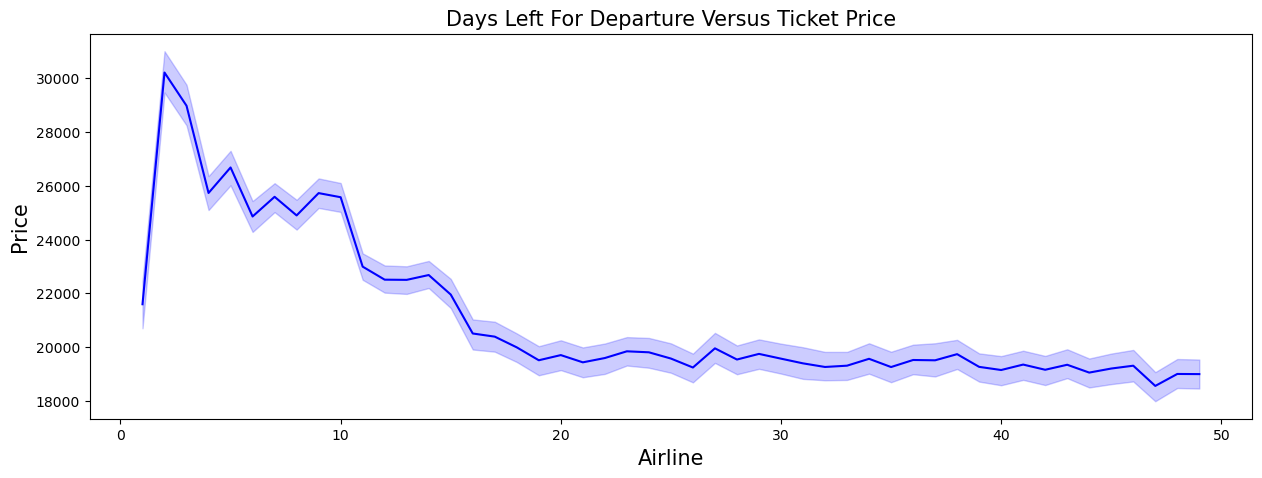

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)  
plt.show()

<Axes: xlabel='airline', ylabel='price'>

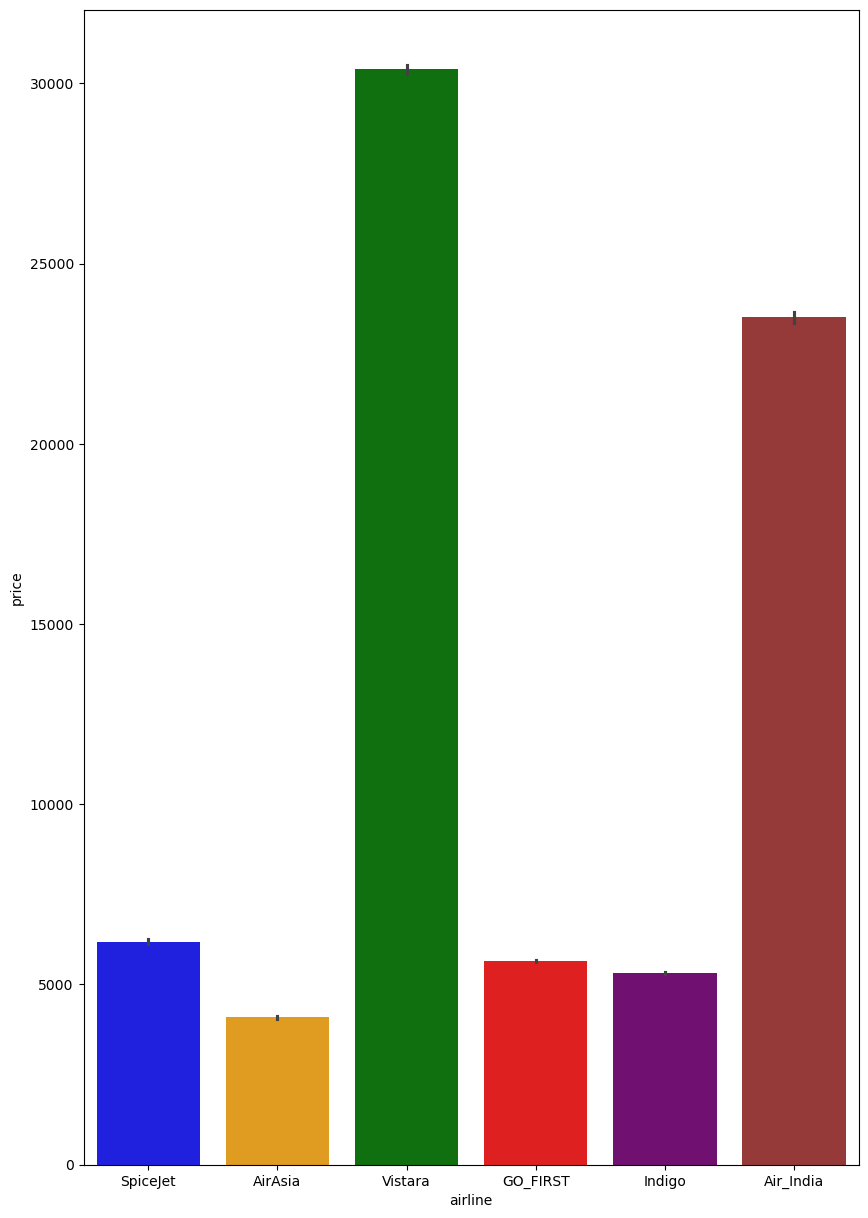

In [32]:
plt.figure(figsize=(10,15));
sns.barplot(x='airline',y='price',data=df,hue='airline',palette=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

<Axes: xlabel='class', ylabel='price'>

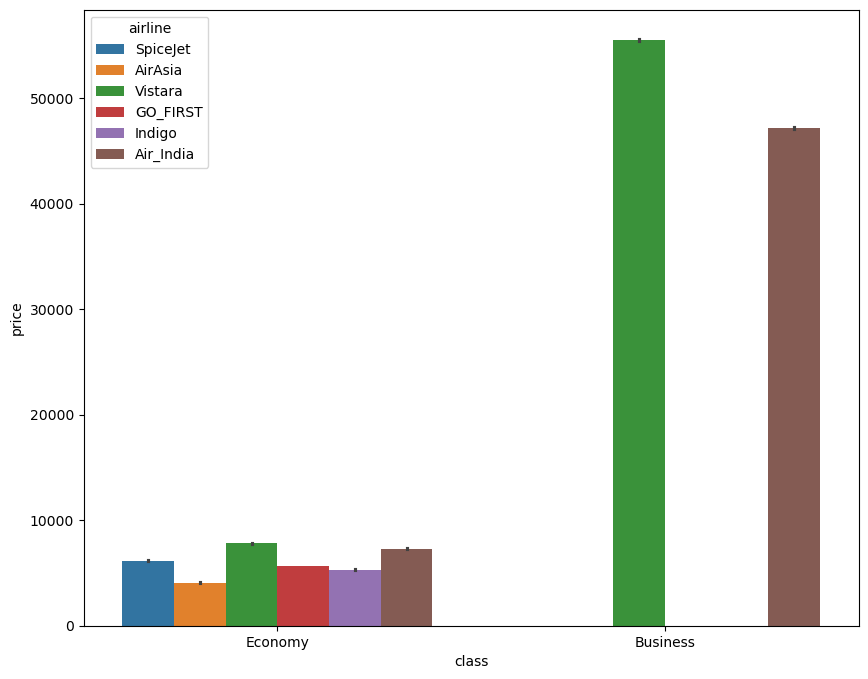

In [26]:
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue='airline')

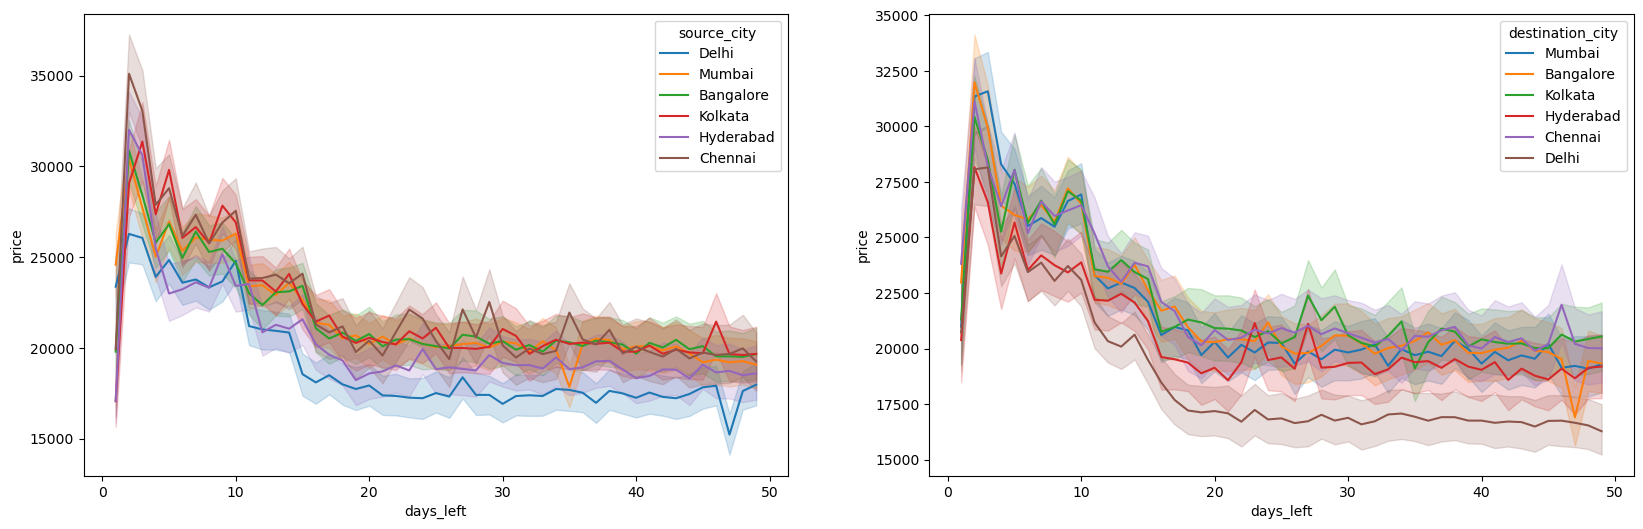

In [14]:
fig, ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

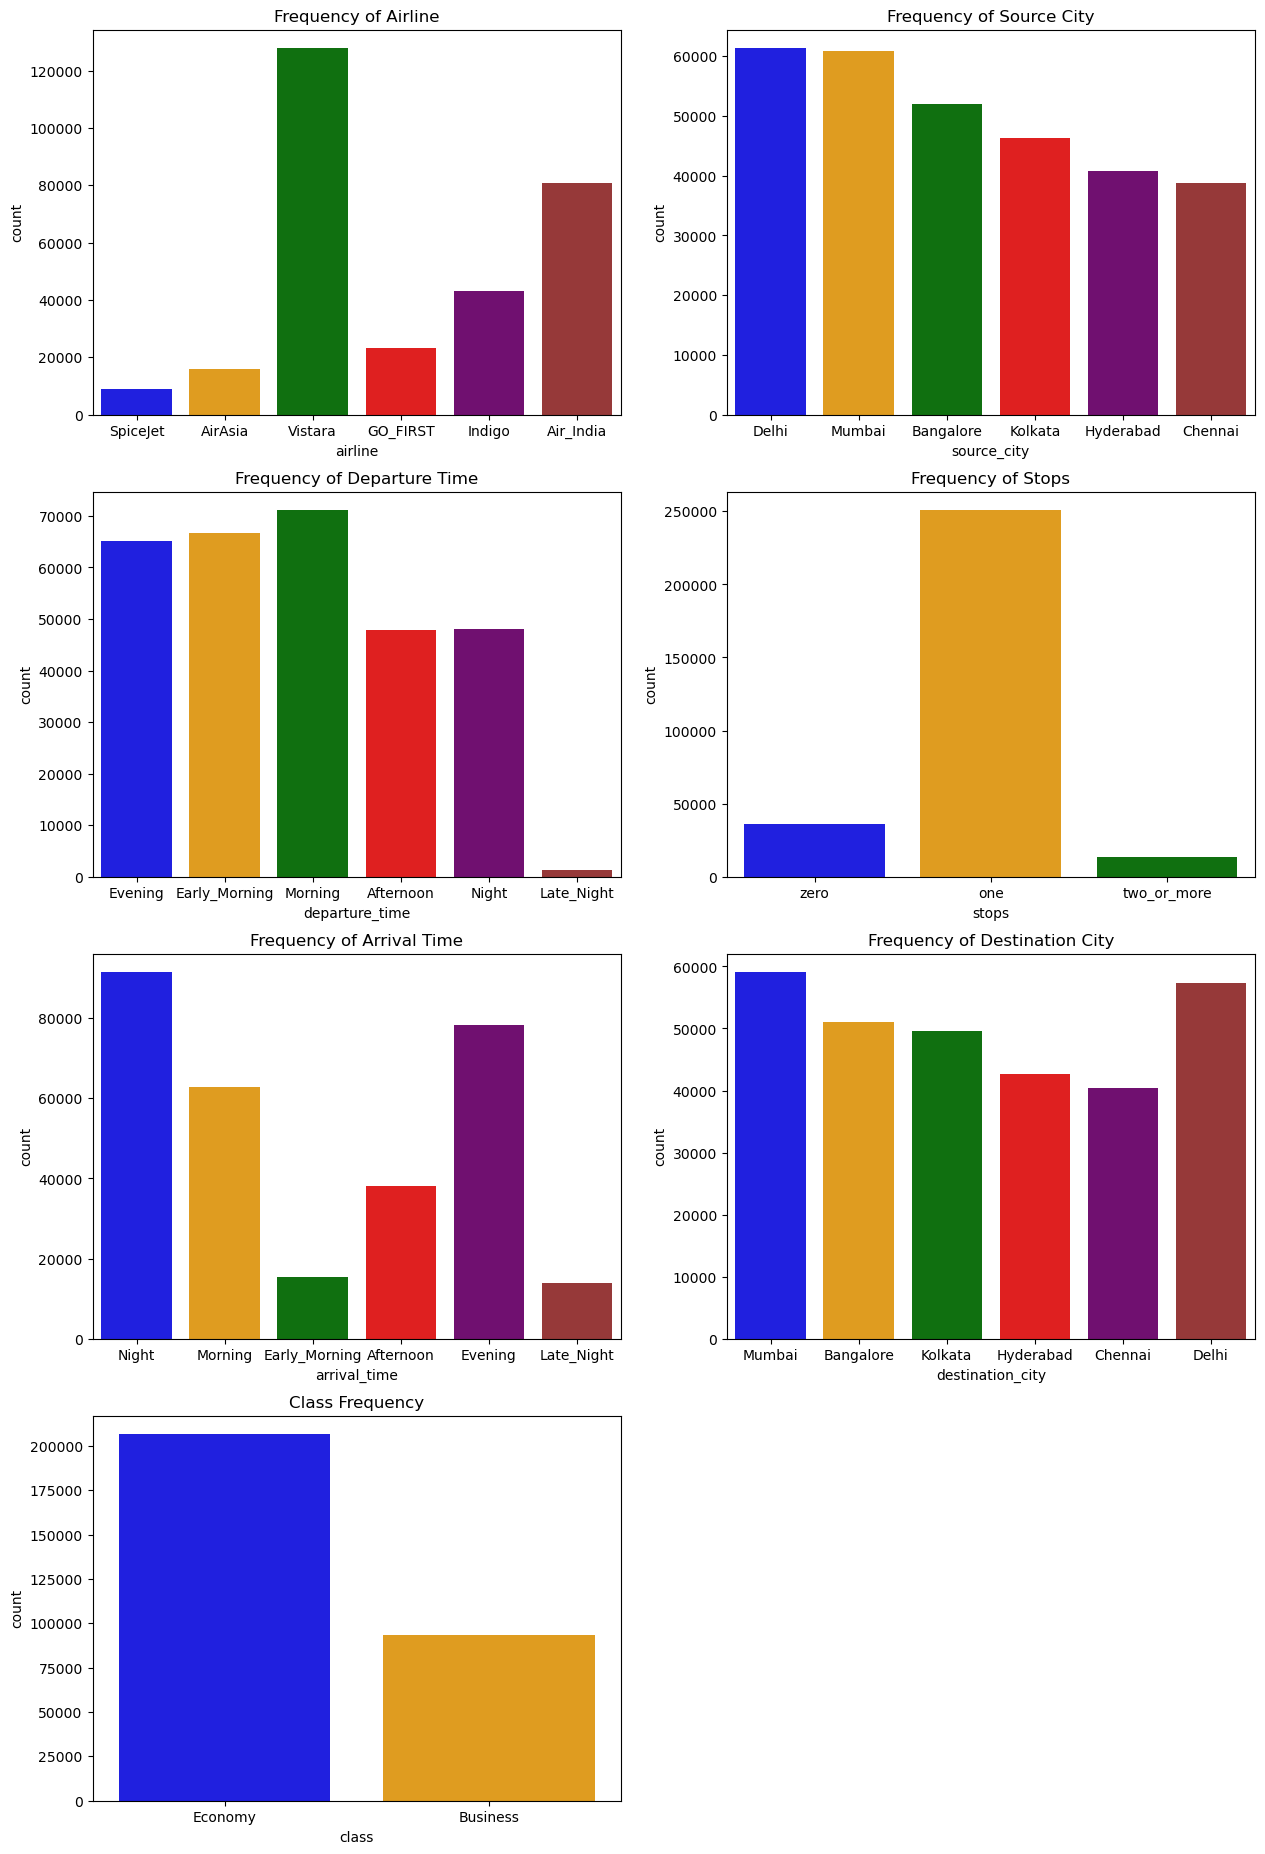

In [62]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'], data=df, hue='airline',palette=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'], data=df,hue='source_city',palette=['blue', 'orange', 'green', 'red', 'purple', 'brown'] )
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'], data=df, hue='departure_time',palette=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'], data=df, hue='stops',palette=['blue', 'orange', 'green'])
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'], data=df, hue='arrival_time',palette=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'], data=df, hue='destination_city',palette=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'], data=df, hue='class',palette=['blue', 'orange'])
plt.title('Class Frequency')

plt.show()

In [112]:
# Check which columns contain the value 'SG-8709'
df[df == 'SG-8709'].dropna(axis=1, how='all')
# Drop the 'flight' column from the DataFrame
df_encoded = df.drop(['flight'], axis=1)

# Check the new DataFrame structure
print(df_encoded.columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')


In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


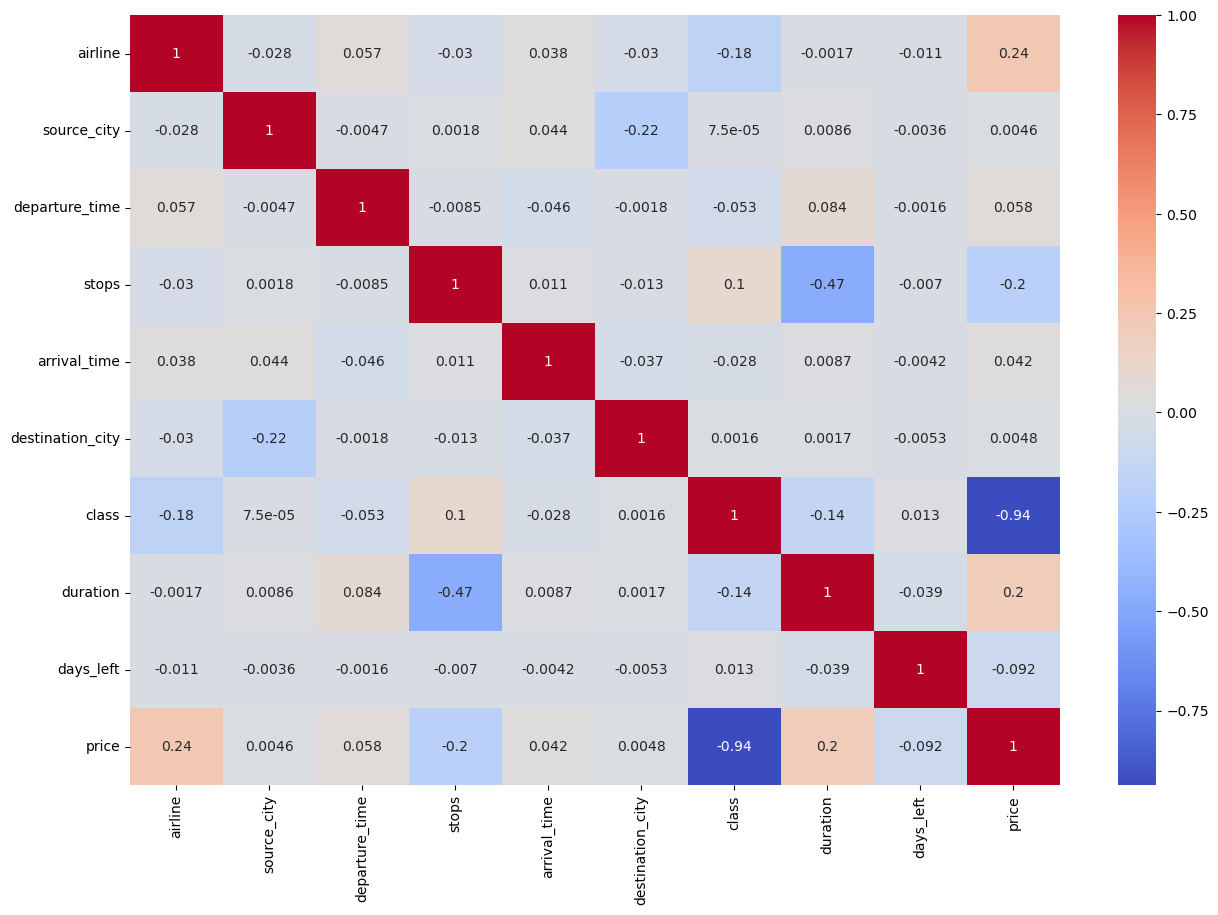

In [124]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
print(vif_data)                  

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [132]:
df= df.drop(columns=['stops'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
print(vif_data)                  

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [140]:
x = df.drop(columns=['price'])
y = df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [144]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

7259.934664536732

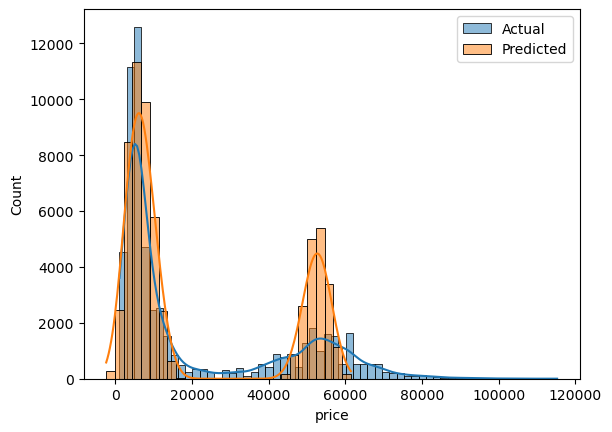

In [172]:
sns.histplot(y_test,label='Actual',kde=True)
sns.histplot(y_pred,label='Predicted',kde=True)
plt.legend()

In [180]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

3610.3871059139983

In [182]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2821.5947381318547